# MANE-4962 HW 2
Name: Jean Pasato
RIN: 661955756

In [1]:
### PROBLEM 1:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

# Defining the entire data set
iris = datasets.load_iris()
workset = iris.data

# Definining new features

# First Feature: Sepal Ratio
sepal_length = workset[:,:1]
sepal_width = workset[:,1:2]
new_feature1 = sepal_length / sepal_width 

# Second Feature: Petal Ratio
petal_length = workset[:,2:3]
petal_width = workset[:,3:4]
new_feature2 = petal_length / petal_width
ratios = np.column_stack((new_feature1, new_feature2))

# Define X and y
X = ratios
y = iris.target

# Splitting the data and keep some of the data separate for testing the model
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.50,
    train_size=0.50,
    random_state=123,
    shuffle=True,
    stratify=y)

# Support Vector Model
clf = svm.SVC()
clf.fit(X_train, y_train)

#Accuracy Score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.76


C:\Users\PASATJ\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[ 975    1    0    2    2]
 [  11 1015    1    0    5]
 [   1    0  975    4    2]
 [   6    0    3  949    0]
 [  10    7    6    4  947]]

Yes, we can visualize the data using a pairplot, but a heatmap would be more appropriate


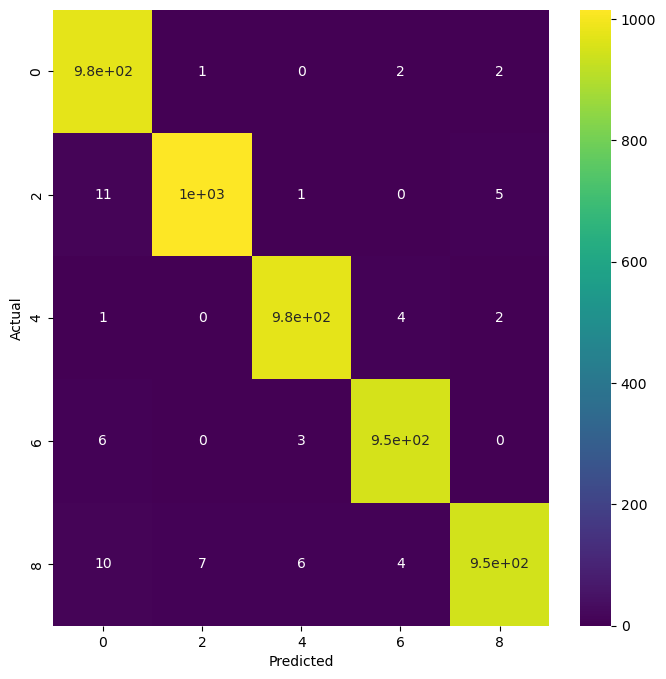

In [22]:
### PROBLEM 2:

from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def class_calculator(df, class_integer):
    return (df[df['target']==class_integer])

# Separate and Define Training and Testing Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Slicing Training and Testing Data
x_mod_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[1])
x_mod_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[1])

# Defining Training and Testing dataframes
df_train = pd.DataFrame(x_mod_train)
df_test = pd.DataFrame(x_mod_test)
df_train['target'] = y_train
df_test['target'] = y_test

def class_calculator(df, class_integer):
    return (df[df['target']==class_integer])

# Selecting only even numbers for Training
df_train_even = df_train[df_train['target']%2 ==0] # Module selects only even numbers
df_train_even_features = df_train_even.drop(['target'],axis=1).to_numpy()
df_train_even_targets = df_train_even['target'].to_numpy()

# Selecting only even numbers for Testing
df_test_even = df_test[df_test['target']%2 ==0] # Module selects only even numbers
df_test_features_even = df_test_even.drop(['target'],axis=1).to_numpy()
df_test_targets_even = df_test_even['target'].to_numpy()

# Classifier
_x_train = df_train_even_features
_x_test = df_test_features_even
_y_train = df_train_even_targets
_y_test = df_test_targets_even
clf = KNeighborsClassifier(n_neighbors=3, p = 2, n_jobs=1)
clf.fit(_x_train,_y_train)

preds = clf.predict(_x_test)

cm = confusion_matrix(_y_test,preds)

# Set labels for each even number
labels = [0,2,4,6,8]

plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap= 'viridis')
ax.set_xticklabels(labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_yticklabels(labels)
print(cm)
print()
print("Yes, we can visualize the data using a pairplot, but a heatmap would be more appropriate")

In [16]:
### PROBLEM 2 (CONTINUED):
percentage = (9.5*10**2)/((9.5*10**2) + 3 + 6) * 100
print("With a total of 959 actual instances of the number 6, about {}% were correctly classified.".format(percentage))

With a total of 959 actual instances of the number 6, about 99.06152241918666% was correctly classified.


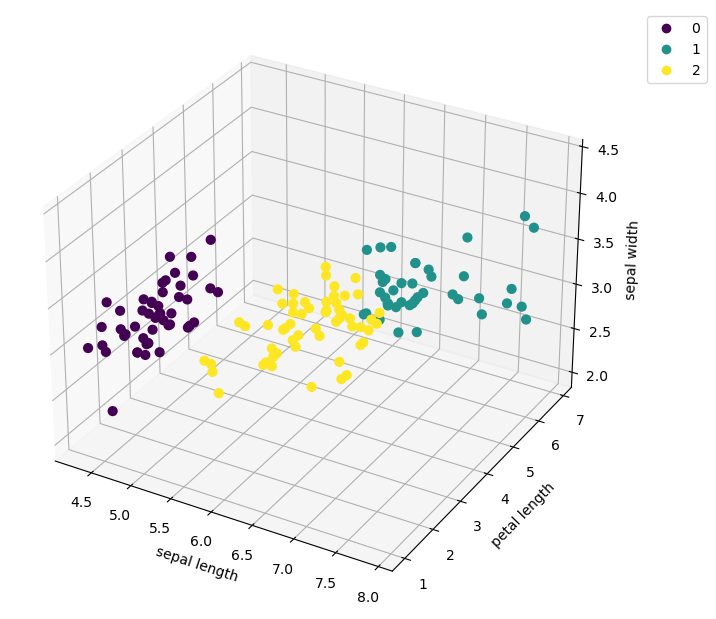

In [14]:
### PROBLEM 3:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Use Pandas to create a data frame and slice data
data = load_iris()
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]

X = df.to_numpy()
df['target'] = data['target']
named_targets = []
for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])
df['species_name'] = named_targets

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

x = df['sepal length'].to_list()
y = df['petal length'].to_list()
z = df['sepal width'].to_list()

species= df['target'].to_list()
species_names= df['species_name'].to_list()

X = df.drop(['target', 'species_name'],axis=1).to_numpy()
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids
                
    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X_test)
cluster_coords = model.centroids

all_kmeans_labels = model.predict(X)
             
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
                                   
x = df['sepal length'].to_list()
y = df['petal length'].to_list()
z = df['sepal width'].to_list()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
sc = ax.scatter(x, y, z, s=40, c=all_kmeans_labels, marker='o', alpha=1)
ax.set_xlabel('sepal length')
ax.set_ylabel('petal length')
ax.set_zlabel('sepal width')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

